In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [3]:
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [7]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 16s 37ms/step - loss: 0.3690 - accuracy: 0.8876 - val_loss: 0.0877 - val_accuracy: 0.9755
Epoch 2/5
422/422 [==============================] - 16s 38ms/step - loss: 0.1140 - accuracy: 0.9651 - val_loss: 0.0649 - val_accuracy: 0.9807
Epoch 3/5
422/422 [==============================] - 15s 36ms/step - loss: 0.0870 - accuracy: 0.9735 - val_loss: 0.0507 - val_accuracy: 0.9858
Epoch 4/5
422/422 [==============================] - 16s 37ms/step - loss: 0.0713 - accuracy: 0.9782 - val_loss: 0.0414 - val_accuracy: 0.9893
Epoch 5/5
422/422 [==============================] - 16s 37ms/step - loss: 0.0619 - accuracy: 0.9810 - val_loss: 0.0372 - val_accuracy: 0.9903


In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.038168810307979584
Test accuracy: 0.9879999756813049


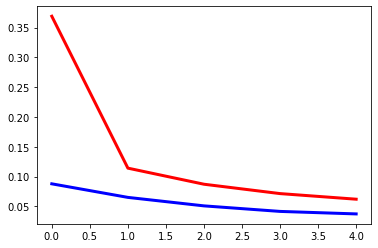

In [10]:
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.show()

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn import datasets
cancer = datasets.load_breast_cancer()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
model = Sequential()
layer1 = Dense(units=32, activation = 'relu', input_dim = 30)
model.add(layer1)
model.add(Dense(units=16, activation = 'relu'))
model.add(Dense(units=1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
history = model.fit(x_train, y_train, epochs=20, batch_size = 50, validation_data=(x_test, y_test))

Epoch 1/20
10/10 [==============================] - 0s 9ms/step - loss: 0.6091 - accuracy: 0.7209 - val_loss: 0.5224 - val_accuracy: 0.7895
Epoch 2/20
10/10 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.8462 - val_loss: 0.4013 - val_accuracy: 0.8684
Epoch 3/20
10/10 [==============================] - 0s 1ms/step - loss: 0.3623 - accuracy: 0.8989 - val_loss: 0.3179 - val_accuracy: 0.9298
Epoch 4/20
10/10 [==============================] - 0s 1ms/step - loss: 0.2874 - accuracy: 0.9253 - val_loss: 0.2601 - val_accuracy: 0.9386
Epoch 5/20
10/10 [==============================] - 0s 2ms/step - loss: 0.2328 - accuracy: 0.9385 - val_loss: 0.2210 - val_accuracy: 0.9386
Epoch 6/20
10/10 [==============================] - 0s 1ms/step - loss: 0.1938 - accuracy: 0.9560 - val_loss: 0.1922 - val_accuracy: 0.9386
Epoch 7/20
10/10 [==============================] - 0s 2ms/step - loss: 0.1649 - accuracy: 0.9648 - val_loss: 0.1707 - val_accuracy: 0.9561
Epoch 8/20
10/10 [==

In [15]:
predictions = model.predict(x_test)
score = model.evaluate(x_test, y_test)
score

4/4 [==============================] - 0s 500us/step - loss: 0.1039 - accuracy: 0.9474


[0.10394591838121414, 0.9473684430122375]

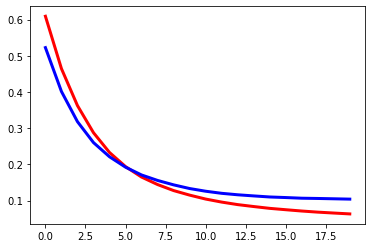

In [23]:
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)

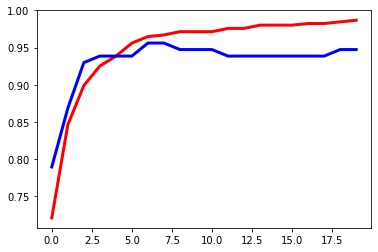

In [22]:
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)